In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('corona_tested_006.csv')
data.head()

C:\Users\ITC\AppData\Local\Temp\ipykernel_26912\2792723377.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [3]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  278848
No of col =  11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [5]:
data = data.dropna()

In [6]:
data.shape

(138172, 11)

In [7]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool')
data['Fever'] = data['Fever'].astype('bool')
data['Sore_throat'] = data['Sore_throat'].astype('bool')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool')
data['Headache'] = data['Headache'].astype('bool')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138172 entries, 13727 to 156039
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               138172 non-null  int64 
 1   Test_date            138172 non-null  object
 2   Cough_symptoms       138172 non-null  bool  
 3   Fever                138172 non-null  bool  
 4   Sore_throat          138172 non-null  bool  
 5   Shortness_of_breath  138172 non-null  bool  
 6   Headache             138172 non-null  bool  
 7   Corona               138172 non-null  object
 8   Age_60_above         138172 non-null  object
 9   Sex                  138172 non-null  object
 10  Known_contact        138172 non-null  object
dtypes: bool(5), int64(1), object(5)
memory usage: 8.0+ MB


In [10]:
data['Corona'].value_counts()  # yesma kina positive 10626 ra arko ma kina 14000 jati aako bhanda tesma sex ra age above 60 hatako xaina

Corona
negative    125668
positive     10626
other         1878
Name: count, dtype: int64

In [12]:
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13734,13735,22-03-2020,False,False,False,False,False,negative,No,male,Other
13735,13736,22-03-2020,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [13]:
df1 = data[data['Corona']=='positive']
df2 = data[data['Corona']=='negative'].sample(frac = 1).iloc[0:10626]

In [15]:
data = pd.concat([df1, df2], axis = 0).sample(frac = 1)
data               

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
52581,52582,29-03-2020,False,False,False,False,False,negative,No,female,Other
67562,67563,31-03-2020,False,False,False,False,False,negative,Yes,male,Other
118816,118817,08-04-2020,False,True,True,False,False,positive,No,female,Contact with confirmed
71219,71220,01-04-2020,True,True,False,True,False,positive,Yes,female,Other
54297,54298,29-03-2020,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
88662,88663,03-04-2020,False,True,False,False,False,positive,No,male,Contact with confirmed
136999,137000,12-04-2020,False,False,False,False,False,negative,No,male,Other
128651,128652,10-04-2020,True,True,False,False,False,negative,No,male,Abroad
121484,121485,09-04-2020,True,True,True,False,True,positive,No,female,Contact with confirmed


In [16]:
data = data.iloc[0:, 2:]
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
52581,False,False,False,False,False,negative,No,female,Other
67562,False,False,False,False,False,negative,Yes,male,Other
118816,False,True,True,False,False,positive,No,female,Contact with confirmed
71219,True,True,False,True,False,positive,Yes,female,Other
54297,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
88662,False,True,False,False,False,positive,No,male,Contact with confirmed
136999,False,False,False,False,False,negative,No,male,Other
128651,True,True,False,False,False,negative,No,male,Abroad
121484,True,True,True,False,True,positive,No,female,Contact with confirmed


In [17]:
data['Known_contact'].value_counts()

Known_contact
Other                     13441
Contact with confirmed     5348
Abroad                     2463
Name: count, dtype: int64

In [18]:
data['Sex'].value_counts()

Sex
male      11357
female     9895
Name: count, dtype: int64

In [19]:
data['Age_60_above'].value_counts()

Age_60_above
No     17396
Yes     3856
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')                                                                

In [26]:
data = data.sample(frac = 1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21252 entries, 98136 to 89804
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cough_symptoms       21252 non-null  bool 
 1   Fever                21252 non-null  bool 
 2   Sore_throat          21252 non-null  bool 
 3   Shortness_of_breath  21252 non-null  bool 
 4   Headache             21252 non-null  bool 
 5   Corona               21252 non-null  int32
 6   Age_60_above         21252 non-null  int32
 7   Sex                  21252 non-null  int32
 8   Known_contact        21252 non-null  int32
dtypes: bool(5), int32(4)
memory usage: 601.9 KB


In [36]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
98136,False,False,False,False,False,0,0,0,2
47027,True,False,False,False,False,0,0,1,0
54863,True,False,False,False,True,1,0,1,1
52230,False,False,False,False,False,1,1,1,2
34585,False,False,False,False,False,0,0,0,2
...,...,...,...,...,...,...,...,...,...
111740,True,True,False,False,False,1,0,0,2
55673,False,False,False,False,False,0,0,1,2
51459,True,True,True,False,True,1,0,0,1
18865,False,False,False,False,False,0,0,0,2


In [28]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.398908,0.185746,0.177535,0.197346,0.346233,-0.023696,0.047242,-0.376075
Fever,0.398908,1.000000,0.160224,0.177787,0.242374,0.414464,0.051472,0.087318,-0.220349
Sore_throat,0.185746,0.160224,1.000000,0.158138,0.291185,0.258253,-0.035273,-0.034613,-0.101096
Shortness_of_breath,0.177535,0.177787,0.158138,1.000000,0.173946,0.217296,0.029097,-0.001008,-0.076185
Headache,0.197346,0.242374,0.291185,0.173946,1.000000,0.319913,-0.049007,-0.015779,-0.124928
Corona,0.346233,0.414464,0.258253,0.217296,0.319913,1.000000,0.030524,0.063108,-0.369972
Age_60_above,-0.023696,0.051472,-0.035273,0.029097,-0.049007,0.030524,1.000000,-0.020716,0.051402
Sex,0.047242,0.087318,-0.034613,-0.001008,-0.015779,0.063108,-0.020716,1.000000,-0.018979
Known_contact,-0.376075,-0.220349,-0.101096,-0.076185,-0.124928,-0.369972,0.051402,-0.018979,1.000000


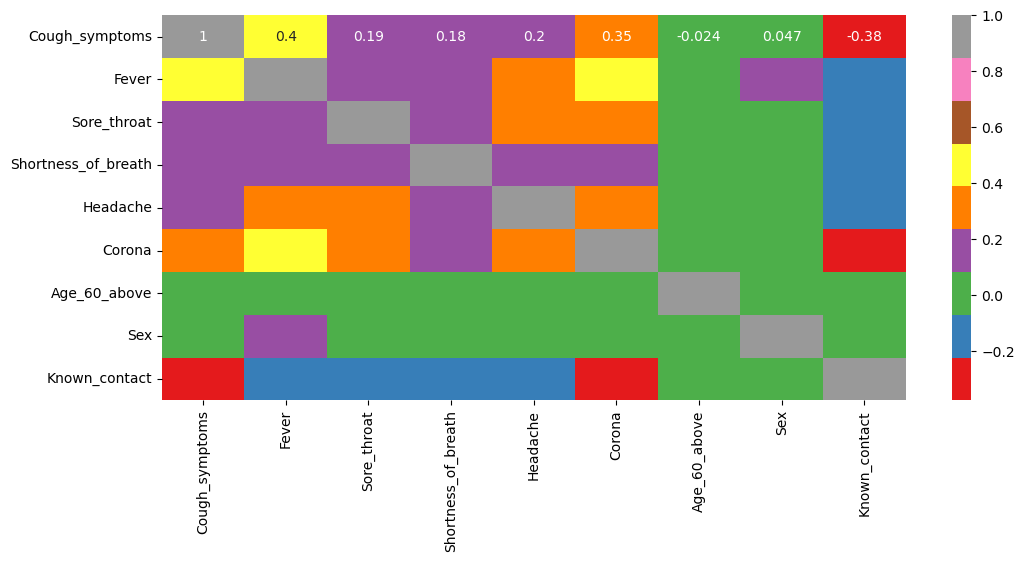

In [31]:
plt.figure(figsize = (12,5))
corr = data.corr()
sns.heatmap(corr, annot= True, cmap= 'Set1')
plt.show()

In [32]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [34]:
X = data[['Cough_symptoms','Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
Y = data['Corona']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
import pickle
with open('Covid_Classification.pickle', 'wb') as f:
    pickle.dump(svc,f)

In [38]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
118745,True,True,False,True,True,0,1,1
17875,True,False,False,True,True,0,1,0
29593,True,False,False,False,False,0,0,1
72780,True,False,False,False,False,0,0,2
27249,False,False,False,False,False,0,0,2
...,...,...,...,...,...,...,...,...
102771,False,False,False,False,False,1,0,2
130274,False,True,True,False,False,0,1,2
14426,True,False,False,False,True,1,1,1
137880,True,True,False,False,False,0,1,1


In [39]:
y_pred = svc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [40]:
Y_test

118745    1
17875     1
29593     1
72780     1
27249     0
         ..
102771    0
130274    1
14426     1
137880    1
85008     0
Name: Corona, Length: 4251, dtype: int32

In [44]:
svc_accuracy = round(accuracy_score(Y_test,y_pred)*100,2)
svc_accuracy

86.57

In [47]:
Y_train_pred = svc.predict(X_train)
svc_accuracy1= round(accuracy_score(Y_train,Y_train_pred), 2)*100 
svc_accuracy1

87.0

In [58]:
#Cough_symptoms	Fever	Sore_throat	Shortness_of_breath	Headache	Known_contact
Cough_symptoms = int(input("Cough_symptoms Enter 1 for True 0 for False = "))
Fever = float(input(" Fever Enter 1 for True 0 for False = "))
Sore_throat = float(input("Sore_throat Enter 1 for True 0 for False ="))
Shortness_of_breath = float(input("Shortness_of_breath Enter 1 for True 0 for False = "))
Headache = float(input("Headache Enter 1 for True 0 for False = "))
Age_60_above = int(input("Age_60_above Enter 1 for True 0 for False = "))
Sex = int(input("Sex Enter 1 for Male 0 for Female = "))
Known_contact = float(input("0 for Abroad 1 for Contact with confirmed 2 for Other = "))

new_data = {'Cough_symptoms':[Cough_symptoms],
            'Fever':[Fever],
            'Sore_throat':[Sore_throat],
            'Shortness_of_breath':[Shortness_of_breath],
            'Headache':[Headache],
            'Age_60_above': [Age_60_above],
            'Sex': [Sex],
            'Known_contact':[Known_contact],}
d = pd.DataFrame(new_data)

Cough_symptoms Enter 1 for True 0 for False =  1
 Fever Enter 1 for True 0 for False =  1
Sore_throat Enter 1 for True 0 for False = 1
Shortness_of_breath Enter 1 for True 0 for False =  1
Headache Enter 1 for True 0 for False =  1
Age_60_above Enter 1 for True 0 for False =  1
Sex Enter 1 for Male 0 for Female =  1
0 for Abroad 1 for Contact with confirmed 2 for Other =  1


In [59]:
Y_score = svc.predict(d)
Y_score[0]

1

In [60]:
if Y_score[0]==1:
    print("Positive")
else:
    print("Negative")

Positive


In [61]:
Y_pred = svc.predict(X_test)
Y_pred

array([1, 1, 1, ..., 1, 1, 0])

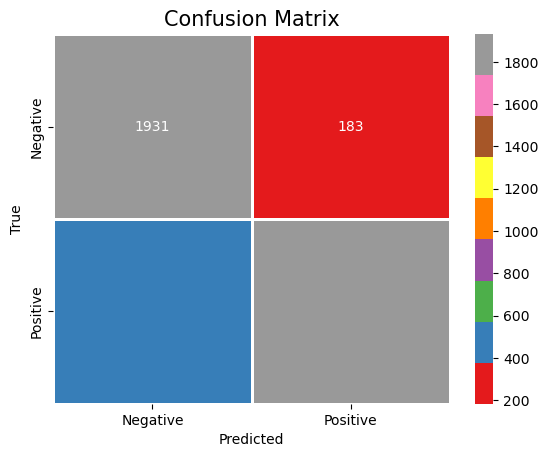

In [62]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ["Negative", "Positive"]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=1,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()